In [541]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/a0m00vn/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [542]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [543]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [544]:
X_original = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [545]:
X_original[:5]

array([[1.000e+00, 2.208e+01, 1.146e+01, 2.000e+00, 4.000e+00, 4.000e+00,
        1.585e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+02, 1.213e+03],
       [0.000e+00, 2.267e+01, 7.000e+00, 2.000e+00, 8.000e+00, 4.000e+00,
        1.650e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.600e+02, 1.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        1.250e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.800e+02, 1.000e+00],
       [0.000e+00, 2.167e+01, 1.150e+01, 1.000e+00, 5.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.100e+01, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00],
       [1.000e+00, 2.017e+01, 8.170e+00, 2.000e+00, 6.000e+00, 4.000e+00,
        1.960e+00, 1.000e+00, 1.000e+00, 1.400e+01, 0.000e+00, 2.000e+00,
        6.000e+01, 1.590e+02]])

In [546]:
y[:5]

array([0, 0, 0, 1, 1])

In [547]:
#Feature scaling

In [548]:
from sklearn.preprocessing import MinMaxScaler

In [549]:
sc = MinMaxScaler(feature_range=(0,1))

In [550]:
X = sc.fit_transform(X_original)

In [551]:
X[:5]

array([[1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
        0.375     , 0.05561404, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.05      , 0.01212   ],
       [0.        , 0.13413534, 0.25      , 0.5       , 0.53846154,
        0.375     , 0.00578947, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.08      , 0.        ],
       [0.        , 0.23804511, 0.0625    , 0.        , 0.23076923,
        0.375     , 0.04385965, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.14      , 0.        ],
       [0.        , 0.11909774, 0.41071429, 0.        , 0.30769231,
        0.25      , 0.        , 1.        , 1.        , 0.1641791 ,
        1.        , 0.5       , 0.        , 0.        ],
       [1.        , 0.09654135, 0.29178571, 0.5       , 0.38461538,
        0.375     , 0.06877193, 1.        , 1.        , 0.20895522,
        0.        , 0.5       , 0.03      , 0.00158   ]])

In [552]:
from minisom import MiniSom

In [553]:
len(X[0])

14

In [554]:
# Grid size
gridSizeX = 15
gridSizeY = 15

In [555]:
som = MiniSom(x = gridSizeX,y=gridSizeY, input_len= len(X[0]),sigma=1.0,learning_rate=0.5)

In [556]:
som.random_weights_init(X)

In [557]:
som.train_random(X,1000)

In [558]:
from pylab import bone,pcolor,colorbar,plot,show

In [559]:
bone()

<Figure size 432x288 with 0 Axes>

In [560]:
matrix  = som.distance_map()

In [561]:
matrix.shape

(15, 15)

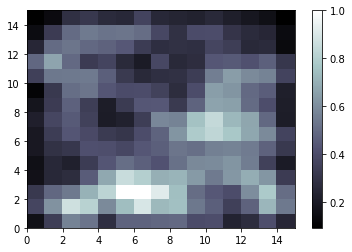

In [562]:
pcolor(matrix.T)
colorbar()
# plot(0 + 0.5,
#          1 + 0.5,
#          'p',
#          markeredgecolor = 'r',
#          markerfacecolor = 'None',
#          markersize = 10,
#          markeredgewidth = 2)

In [563]:
y.shape

(690,)

In [564]:
mdict = {}
mdictDefaulter = {}
mdictNonDefaulter = {}
for i,x in enumerate(X):
    winnerCell = som.winner(x)
    if(winnerCell in mdict.keys()):
        mdict[winnerCell] += 1
    else:
        mdict[winnerCell] = 1
    cls = y[i]
    if(cls == 0):
        if(winnerCell in mdictNonDefaulter.keys()):
            mdictNonDefaulter[winnerCell] += 1
        else:
            mdictNonDefaulter[winnerCell] = 1
    else:
        if(winnerCell in mdictDefaulter.keys()):
            mdictDefaulter[winnerCell] += 1
        else:
            mdictDefaulter[winnerCell] = 1

In [565]:
print(mdict)

{(2, 3): 5, (14, 0): 20, (0, 0): 7, (2, 14): 3, (13, 14): 9, (12, 1): 9, (13, 8): 8, (12, 8): 11, (0, 14): 7, (9, 11): 7, (9, 8): 6, (2, 6): 5, (14, 6): 5, (6, 12): 13, (10, 2): 8, (11, 2): 13, (7, 5): 3, (13, 7): 7, (14, 4): 6, (14, 8): 6, (9, 10): 2, (5, 5): 3, (8, 11): 2, (3, 12): 6, (4, 0): 3, (5, 8): 6, (7, 13): 6, (0, 13): 4, (12, 5): 9, (1, 8): 3, (11, 6): 6, (11, 10): 15, (1, 13): 9, (14, 1): 12, (13, 9): 19, (9, 2): 6, (0, 3): 10, (2, 11): 4, (6, 6): 6, (5, 14): 11, (12, 14): 7, (10, 5): 8, (11, 12): 5, (1, 0): 10, (5, 7): 1, (4, 1): 5, (7, 7): 2, (10, 0): 4, (14, 9): 15, (9, 9): 1, (10, 14): 7, (3, 4): 4, (14, 11): 9, (9, 0): 7, (7, 0): 9, (14, 7): 8, (0, 5): 5, (12, 7): 7, (0, 6): 4, (13, 13): 4, (4, 6): 2, (4, 9): 3, (13, 12): 5, (7, 4): 4, (12, 12): 3, (8, 5): 7, (2, 5): 5, (0, 12): 6, (5, 10): 8, (7, 12): 1, (14, 13): 4, (0, 7): 3, (8, 2): 3, (10, 4): 7, (8, 8): 4, (1, 14): 2, (6, 1): 4, (2, 9): 6, (9, 13): 4, (5, 6): 4, (3, 7): 7, (1, 1): 8, (9, 7): 1, (1, 3): 3, (14, 3)

In [566]:
print(mdictDefaulter)

{(2, 14): 3, (13, 14): 9, (12, 1): 9, (9, 11): 7, (14, 6): 1, (6, 12): 11, (10, 2): 7, (11, 2): 11, (9, 8): 3, (9, 10): 2, (8, 11): 2, (5, 8): 1, (7, 13): 5, (0, 14): 5, (0, 13): 4, (12, 5): 7, (11, 6): 5, (1, 13): 7, (13, 9): 6, (9, 2): 6, (6, 6): 3, (12, 14): 6, (10, 5): 7, (11, 12): 5, (9, 9): 1, (10, 14): 5, (14, 11): 7, (2, 6): 1, (13, 13): 4, (4, 6): 2, (4, 9): 2, (13, 12): 5, (7, 4): 3, (12, 12): 3, (8, 5): 3, (0, 12): 6, (5, 10): 8, (7, 12): 1, (14, 13): 4, (8, 2): 3, (10, 4): 5, (8, 8): 4, (1, 14): 2, (9, 13): 4, (0, 7): 1, (9, 7): 1, (14, 1): 2, (5, 5): 2, (7, 11): 1, (6, 7): 1, (12, 0): 8, (5, 4): 6, (14, 12): 8, (14, 3): 3, (5, 11): 6, (9, 12): 3, (14, 14): 5, (13, 3): 2, (7, 14): 1, (8, 14): 3, (14, 7): 1, (8, 12): 1, (2, 9): 1, (4, 7): 2, (7, 5): 1, (12, 4): 3, (10, 0): 1, (7, 9): 2, (4, 8): 2, (5, 6): 3, (8, 9): 3, (14, 4): 2, (3, 8): 1, (0, 5): 1, (1, 6): 1, (11, 13): 2, (7, 7): 1, (7, 1): 1, (11, 4): 2, (11, 14): 1, (0, 10): 1, (7, 2): 1, (8, 4): 2, (3, 7): 4, (7, 3): 

In [567]:
print(mdictNonDefaulter)

{(2, 3): 5, (14, 0): 20, (0, 0): 7, (13, 8): 8, (12, 8): 11, (0, 14): 2, (9, 8): 3, (2, 6): 4, (7, 5): 2, (13, 7): 7, (14, 4): 4, (14, 8): 6, (5, 5): 1, (3, 12): 6, (4, 0): 3, (1, 8): 3, (6, 12): 2, (11, 10): 14, (14, 1): 10, (0, 3): 10, (2, 11): 4, (5, 14): 11, (1, 0): 9, (5, 7): 1, (4, 1): 5, (7, 7): 1, (10, 0): 3, (14, 9): 15, (3, 4): 4, (9, 0): 7, (7, 0): 9, (14, 7): 7, (0, 5): 4, (12, 7): 7, (0, 6): 4, (14, 6): 4, (2, 5): 5, (0, 7): 2, (13, 9): 13, (6, 6): 3, (6, 1): 4, (2, 9): 5, (5, 6): 1, (3, 7): 3, (1, 1): 8, (1, 3): 3, (14, 3): 7, (11, 4): 1, (5, 4): 3, (0, 1): 3, (11, 8): 14, (1, 6): 2, (5, 8): 5, (1, 4): 4, (8, 5): 4, (11, 6): 1, (7, 2): 3, (8, 4): 1, (0, 10): 4, (0, 9): 1, (7, 13): 1, (13, 4): 3, (3, 11): 4, (14, 5): 1, (4, 14): 4, (1, 9): 4, (3, 5): 2, (12, 4): 1, (14, 11): 2, (7, 3): 1, (4, 7): 4, (3, 3): 1, (0, 4): 1, (11, 7): 5, (11, 2): 2, (12, 10): 3, (10, 6): 1, (12, 5): 2, (0, 8): 2, (10, 14): 2, (4, 9): 1, (8, 0): 1, (8, 9): 1, (10, 5): 1, (1, 13): 2, (9, 12): 1, 

In [568]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdict.keys()):
            print(mdict[(i,j)],end=' ')
        else:
            print(0,end=' ')
    print()

7 3 0 10 1 5 4 3 2 1 5 0 6 4 7 
10 8 0 3 4 0 3 0 3 4 0 0 0 9 2 
0 1 0 5 0 5 5 0 0 6 0 4 0 0 3 
0 0 0 1 4 3 0 7 1 0 0 4 6 0 0 
3 5 0 0 0 0 2 6 2 3 0 0 0 0 4 
0 0 0 0 9 3 4 1 6 0 8 6 0 0 11 
0 4 1 0 0 0 6 1 0 0 0 0 13 0 0 
9 1 4 2 4 3 0 2 0 2 0 1 1 6 1 
1 0 3 0 3 7 0 0 4 4 0 2 1 1 3 
7 0 6 0 0 0 0 1 6 1 2 7 4 4 0 
4 0 8 0 7 8 1 0 0 0 0 0 0 0 7 
0 0 13 0 3 0 6 5 14 0 15 0 5 2 1 
8 9 0 0 4 9 0 7 11 0 3 0 3 2 7 
0 0 0 2 4 0 0 7 8 19 0 0 5 4 9 
20 12 0 10 6 1 5 8 6 15 0 9 8 4 6 


In [569]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictDefaulter.keys()):
            print(mdictDefaulter[(i,j)],end=' ')
        else:
            mdictDefaulter[(i,j)] = 0
            print(0,end=' ')
    print()

0 0 0 0 0 1 0 1 0 0 1 0 6 4 5 
1 0 0 0 0 0 1 0 0 0 0 0 0 7 2 
0 1 0 0 0 0 1 0 0 1 0 0 0 0 3 
0 0 0 0 0 1 0 4 1 0 0 0 0 0 0 
0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 
0 0 0 0 6 2 3 0 1 0 8 6 0 0 0 
0 0 0 0 0 0 3 1 0 0 0 0 11 0 0 
0 1 1 1 3 1 0 1 0 2 0 1 1 5 1 
0 0 3 0 2 3 0 0 4 3 0 2 1 1 3 
0 0 6 0 0 0 0 1 3 1 2 7 3 4 0 
1 0 7 0 5 7 0 0 0 0 0 0 0 0 5 
0 0 11 0 2 0 5 0 0 0 1 0 5 2 1 
8 9 0 0 3 7 0 0 0 0 0 0 3 2 6 
0 0 0 2 1 0 0 0 0 6 0 0 5 4 9 
0 2 0 3 2 0 1 1 0 0 0 7 8 4 5 


In [570]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictNonDefaulter.keys()):
            print(mdictNonDefaulter[(i,j)],end=' ')
        else:
            mdictNonDefaulter[(i,j)] = 0
            print(0,end=' ')
    print()

7 3 0 10 1 4 4 2 2 1 4 0 0 0 2 
9 8 0 3 4 0 2 0 3 4 0 0 0 2 0 
0 0 0 5 0 5 4 0 0 5 0 4 0 0 0 
0 0 0 1 4 2 0 3 0 0 0 4 6 0 0 
3 5 0 0 0 0 0 4 0 1 0 0 0 0 4 
0 0 0 0 3 1 1 1 5 0 0 0 0 0 11 
0 4 1 0 0 0 3 0 0 0 0 0 2 0 0 
9 0 3 1 1 2 0 1 0 0 0 0 0 1 0 
1 0 0 0 1 4 0 0 0 1 0 0 0 0 0 
7 0 0 0 0 0 0 0 3 0 0 0 1 0 0 
3 0 1 0 2 1 1 0 0 0 0 0 0 0 2 
0 0 2 0 1 0 1 5 14 0 14 0 0 0 0 
0 0 0 0 1 2 0 7 11 0 3 0 0 0 1 
0 0 0 0 3 0 0 7 8 13 0 0 0 0 0 
20 10 0 7 4 1 4 7 6 15 0 2 0 0 1 


In [571]:
# Difference
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        print(mdictDefaulter[(i,j)]-mdictNonDefaulter[(i,j)],end=' ')
    print()

-7 -3 0 -10 -1 -3 -4 -1 -2 -1 -3 0 6 4 3 
-8 -8 0 -3 -4 0 -1 0 -3 -4 0 0 0 5 2 
0 1 0 -5 0 -5 -3 0 0 -4 0 -4 0 0 3 
0 0 0 -1 -4 -1 0 1 1 0 0 -4 -6 0 0 
-3 -5 0 0 0 0 2 -2 2 1 0 0 0 0 -4 
0 0 0 0 3 1 2 -1 -4 0 8 6 0 0 -11 
0 -4 -1 0 0 0 0 1 0 0 0 0 9 0 0 
-9 1 -2 0 2 -1 0 0 0 2 0 1 1 4 1 
-1 0 3 0 1 -1 0 0 4 2 0 2 1 1 3 
-7 0 6 0 0 0 0 1 0 1 2 7 2 4 0 
-2 0 6 0 3 6 -1 0 0 0 0 0 0 0 3 
0 0 9 0 1 0 4 -5 -14 0 -13 0 5 2 1 
8 9 0 0 2 5 0 -7 -11 0 -3 0 3 2 5 
0 0 0 2 -2 0 0 -7 -8 -7 0 0 5 4 9 
-20 -8 0 -4 -2 -1 -3 -6 -6 -15 0 5 8 4 4 


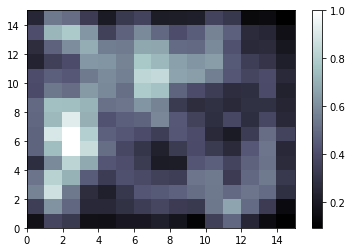

In [572]:
pcolor(matrix)
colorbar()

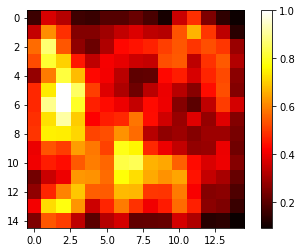

In [573]:
#(0,0) is the left top-most cell 
import matplotlib.pyplot as plt
import numpy as np

# a = np.random.random((16, 16))
a = matrix
plt.imshow(a, cmap='hot', interpolation='nearest')
colorbar()
plt.show()

In [574]:
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data

target = iris.target

t1 = (target==0)

t2 = (target==1)

t3 = t1 | t2

data = data[t3]
target = target[t3]

In [575]:
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)

In [576]:
# Grid size
gridSizeX = 5
gridSizeY = 5
som = MiniSom(x = gridSizeX,y=gridSizeY, input_len= len(data[0]),sigma=1.0,learning_rate=0.5)
# In[158]:
som.random_weights_init(data)
# In[159]:
som.train_random(data,200)
matrix = som.distance_map()

In [577]:
print(matrix.shape)

(5, 5)


In [578]:
mdict = {}
mdictClass1 = {}
mdictClass2 = {}
for i,x in enumerate(data):
    winnerCell = som.winner(x)
    if(winnerCell in mdict.keys()):
        mdict[winnerCell] += 1
    else:
        mdict[winnerCell] = 1
    cls = target[i]
    if(cls == 0):
        if(winnerCell in mdictClass1.keys()):
            mdictClass1[winnerCell] += 1
        else:
            mdictClass1[winnerCell] = 1
    else:
        if(winnerCell in mdictClass2.keys()):
            mdictClass2[winnerCell] += 1
        else:
            mdictClass2[winnerCell] = 1

In [579]:
print(mdict)

{(2, 0): 11, (2, 1): 3, (4, 0): 9, (3, 0): 7, (3, 1): 5, (4, 1): 8, (1, 0): 3, (0, 0): 3, (0, 1): 1, (4, 3): 6, (1, 2): 3, (1, 4): 5, (3, 3): 5, (1, 3): 3, (0, 4): 5, (4, 4): 2, (0, 2): 6, (3, 4): 2, (2, 3): 5, (0, 3): 3, (2, 4): 5}


In [580]:
print(mdictClass1)

{(2, 0): 11, (2, 1): 3, (4, 0): 9, (3, 0): 7, (3, 1): 5, (4, 1): 8, (1, 0): 3, (0, 0): 3, (0, 1): 1}


In [581]:
print(mdictClass2)

{(4, 3): 6, (1, 2): 3, (1, 4): 5, (3, 3): 5, (1, 3): 3, (0, 4): 5, (4, 4): 2, (0, 2): 6, (3, 4): 2, (2, 3): 5, (0, 3): 3, (2, 4): 5}


In [582]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass1.keys()):
            print(mdictClass1[(i,j)],end=' ')
        else:
            mdictClass1[(i,j)] = 0
            print(0,end=' ')
    print()

3 1 0 0 0 
3 0 0 0 0 
11 3 0 0 0 
7 5 0 0 0 
9 8 0 0 0 


In [583]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass2.keys()):
            print(mdictClass2[(i,j)],end=' ')
        else:
            mdictClass2[(i,j)] = 0
            print(0,end=' ')
    print()

0 0 6 3 5 
0 0 3 3 5 
0 0 0 5 5 
0 0 0 5 2 
0 0 0 6 2 


In [584]:
# Difference
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        print(mdictClass1[(i,j)]-mdictClass2[(i,j)],end=' ')
    print()


3 1 -6 -3 -5 
3 0 -3 -3 -5 
11 3 0 -5 -5 
7 5 0 -5 -2 
9 8 0 -6 -2 


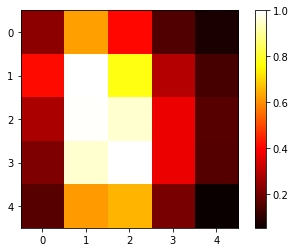

In [585]:
a = matrix
plt.imshow(a, cmap='hot', interpolation='nearest')
colorbar()
plt.show()

In [640]:
iris = datasets.load_iris()

data = iris.data

target = iris.target



# In[268]:


sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)


# In[269]:


# Grid size
gridSizeX = 6
gridSizeY = 6
som = MiniSom(x = gridSizeX,y=gridSizeY, input_len= len(data[0]),sigma=1.0,learning_rate=0.5)
# In[158]:
som.random_weights_init(data)
# In[159]:
som.train_random(data,200)
matrix = som.distance_map()


# In[270]:


print(matrix.shape)

(6, 6)


In [641]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [642]:
mdict = {}
mdictClass1 = {}
mdictClass2 = {}
mdictClass3 = {}
for i,x in enumerate(data):
    winnerCell = som.winner(x)
    if(winnerCell in mdict.keys()):
        mdict[winnerCell] += 1
    else:
        mdict[winnerCell] = 1
    cls = target[i]
    if(cls == 0):
        if(winnerCell in mdictClass1.keys()):
            mdictClass1[winnerCell] += 1
        else:
            mdictClass1[winnerCell] = 1
    elif(cls == 1):
        if(winnerCell in mdictClass2.keys()):
            mdictClass2[winnerCell] += 1
        else:
            mdictClass2[winnerCell] = 1
    else:
        if(winnerCell in mdictClass3.keys()):
            mdictClass3[winnerCell] += 1
        else:
            mdictClass3[winnerCell] = 1

In [643]:
print(mdict)

{(4, 5): 25, (5, 5): 15, (3, 5): 7, (4, 4): 2, (2, 5): 1, (5, 2): 7, (4, 3): 1, (2, 0): 4, (4, 1): 4, (3, 2): 4, (3, 3): 3, (0, 0): 3, (0, 1): 2, (1, 0): 5, (1, 4): 2, (5, 0): 5, (4, 2): 8, (0, 5): 3, (4, 0): 6, (3, 1): 6, (0, 4): 2, (5, 1): 4, (3, 0): 7, (1, 5): 1, (0, 2): 2, (2, 1): 2, (2, 3): 3, (2, 2): 5, (1, 2): 5, (5, 3): 2, (1, 3): 2, (0, 3): 2}


In [644]:
print(mdictClass1)

{(4, 5): 25, (5, 5): 15, (3, 5): 7, (4, 4): 2, (2, 5): 1}


In [645]:
print(mdictClass2)

{(5, 2): 7, (4, 3): 1, (2, 0): 2, (4, 1): 2, (3, 2): 3, (3, 3): 3, (0, 0): 1, (0, 1): 1, (1, 0): 2, (1, 4): 2, (5, 0): 1, (4, 2): 8, (0, 5): 3, (4, 0): 3, (3, 1): 4, (0, 4): 1, (5, 1): 2, (3, 0): 2, (1, 5): 1, (0, 2): 1}


In [646]:
print(mdictClass3)

{(0, 2): 1, (1, 0): 3, (4, 1): 2, (3, 1): 2, (2, 1): 2, (5, 0): 4, (0, 0): 2, (4, 0): 3, (2, 3): 3, (3, 0): 5, (2, 2): 5, (1, 2): 5, (5, 3): 2, (0, 1): 1, (5, 1): 2, (1, 3): 2, (2, 0): 2, (0, 3): 2, (3, 2): 1, (0, 4): 1}


In [647]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass1.keys()):
            print(mdictClass1[(i,j)],end=' ')
        else:
            mdictClass1[(i,j)] = 0
            print(0,end=' ')
    print()

0 0 0 0 0 0 
0 0 0 0 0 0 
0 0 0 0 0 1 
0 0 0 0 0 7 
0 0 0 0 2 25 
0 0 0 0 0 15 


In [648]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass2.keys()):
            print(mdictClass2[(i,j)],end=' ')
        else:
            mdictClass2[(i,j)] = 0
            print(0,end=' ')
    print()

1 1 1 0 1 3 
2 0 0 0 2 1 
2 0 0 0 0 0 
2 4 3 3 0 0 
3 2 8 1 0 0 
1 2 7 0 0 0 


In [649]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass3.keys()):
            print(mdictClass3[(i,j)],end=' ')
        else:
            mdictClass3[(i,j)] = 0
            print(0,end=' ')
    print()

2 1 1 2 1 0 
3 0 5 2 0 0 
2 2 5 3 0 0 
5 2 1 0 0 0 
3 2 0 0 0 0 
4 2 0 2 0 0 


In [650]:
matrix

array([[0.07532321, 0.13709101, 0.08785161, 0.08563578, 0.09990291,
        0.05216418],
       [0.1536778 , 0.20686069, 0.17307934, 0.19818436, 0.31510709,
        0.2291705 ],
       [0.13961335, 0.20143955, 0.18368014, 0.38956369, 0.7230095 ,
        0.54034512],
       [0.13990371, 0.23032398, 0.23584832, 0.60235047, 1.        ,
        0.56432014],
       [0.15661843, 0.23081911, 0.23924323, 0.6754716 , 0.95547495,
        0.42194585],
       [0.06141901, 0.1368723 , 0.14112565, 0.43071122, 0.6304431 ,
        0.21909061]])

In [651]:
matrix2 = matrix
for i in range(gridSizeX):
    for j in range(gridSizeY):
        matrix2[i][j] = round(matrix[i][j],2)
        print(matrix2[i][j],end = ' ')
    print()

0.08 0.14 0.09 0.09 0.1 0.05 
0.15 0.21 0.17 0.2 0.32 0.23 
0.14 0.2 0.18 0.39 0.72 0.54 
0.14 0.23 0.24 0.6 1.0 0.56 
0.16 0.23 0.24 0.68 0.96 0.42 
0.06 0.14 0.14 0.43 0.63 0.22 


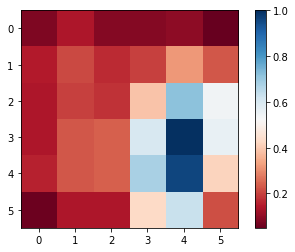

In [652]:
a = matrix2
plt.imshow(a, cmap='RdBu', interpolation='nearest')
colorbar()
plt.show()

In [691]:
cancer = datasets.load_breast_cancer()
data = cancer.data

target = cancer.target



# In[268]:


sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)


# In[269]:


# Grid size
gridSizeX = 6
gridSizeY = 6
som = MiniSom(x = gridSizeX,y=gridSizeY, input_len= len(data[0]),sigma=1.0,learning_rate=0.5)
# In[158]:
som.random_weights_init(data)
# In[159]:
som.train_random(data,1000)
matrix = som.distance_map()


# In[270]:


print(matrix.shape)

(6, 6)


In [692]:
mdict = {}
mdictClass1 = {}
mdictClass2 = {}
for i,x in enumerate(data):
    winnerCell = som.winner(x)
    if(winnerCell in mdict.keys()):
        mdict[winnerCell] += 1
    else:
        mdict[winnerCell] = 1
    cls = target[i]
    if(cls == 0):
        if(winnerCell in mdictClass1.keys()):
            mdictClass1[winnerCell] += 1
        else:
            mdictClass1[winnerCell] = 1
    else:
        if(winnerCell in mdictClass2.keys()):
            mdictClass2[winnerCell] += 1
        else:
            mdictClass2[winnerCell] = 1

In [693]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass1.keys()):
            print(mdictClass1[(i,j)],end=' ')
        else:
            mdictClass1[(i,j)] = 0
            print(0,end=' ')
    print()

0 0 9 0 0 0 
5 13 12 8 0 0 
6 13 12 9 0 0 
11 13 13 8 0 1 
15 11 10 5 0 2 
5 9 15 6 1 0 


In [694]:
for i in range(0,gridSizeX):
    for j in range(0,gridSizeY):
        if((i,j) in mdictClass2.keys()):
            print(mdictClass2[(i,j)],end=' ')
        else:
            mdictClass2[(i,j)] = 0
            print(0,end=' ')
    print()

15 7 2 10 22 30 
12 4 2 7 32 13 
5 1 2 8 20 25 
3 5 0 14 12 27 
0 0 1 20 12 4 
1 0 1 4 18 18 


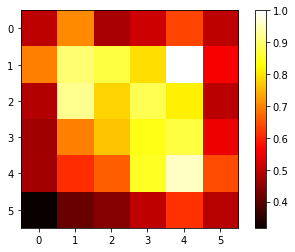

In [695]:
a = matrix
plt.imshow(a, cmap='hot', interpolation='nearest')
colorbar()
plt.show()